# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Закиров Инсаф Венерович. Вариант №8.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{n(n-1)}$$

где $L$ - количество рёбер, $n$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$



### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### Подключение библиотек

In [3]:
install.packages("statnet", repos = "https://cloud.r-project.org/")
install.packages("igraph", repos = "https://cloud.r-project.org/")
library(statnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘coda’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.19.0 (2024-12-08), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



‘ergm’ 4.10.1 (2025-08-26), part of the Statnet Project
* ‘news(package="ergm")’ for changes since last version
* ‘citation("ergm")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


‘ergm’ 4 is a major update tha

In [4]:
library(network)
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




#### №1-3

In [29]:
# №1
data_vec <- c(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0)
m <- matrix(data_vec, nrow = 16, ncol = 16)
m

g <- graph_from_adjacency_matrix(m, mode = "undirected")

# №3
names <- c("Acciaiuoli", "Albizzi", "Barbadori", "Bischeri", "Castellani", "Ginori", "Guadagni", "Lamberteschi", "Medici", "Pazzi", "Peruzzi", "Pucci", "Ridolfi", "Salviati", "Strozzi", "Tornabuoni")
rownames(m) <- names
colnames(m) <- names
m

# №1
mat <- network(m, directed = FALSE)

# №2
edges <- as.edgelist(mat)
edges[1:5,]


0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0


,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


1,9
2,6
2,7
2,9
3,5


#### №4-5

In [6]:
library(igraph)
library(sna)

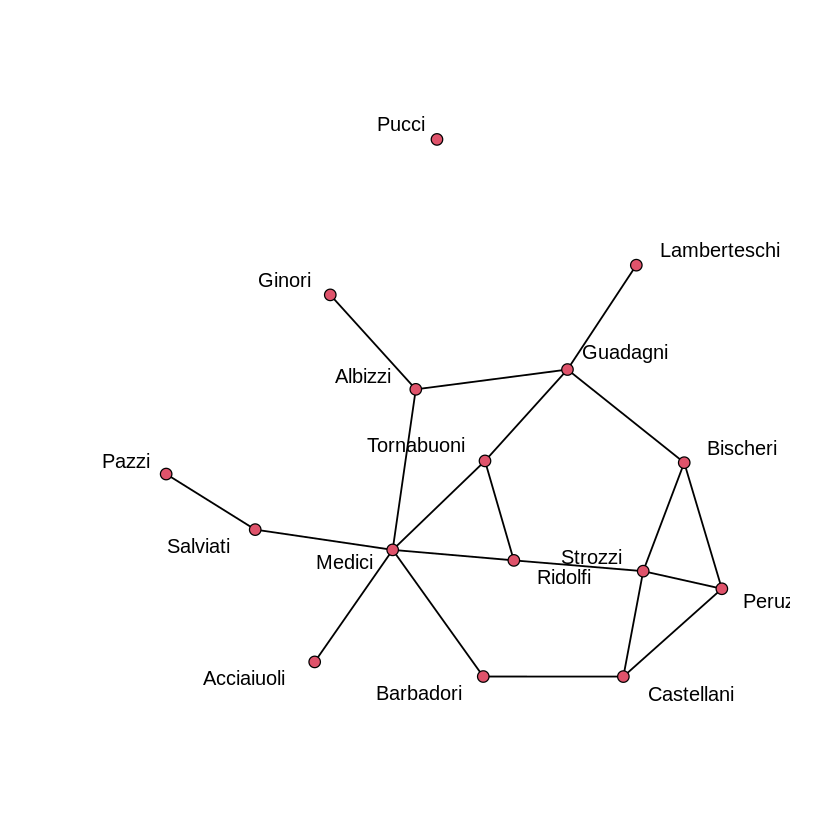

In [35]:
# №4 подаём матрицу, и просим отобразить имена вершин
plot(mat, displaylabels = TRUE)

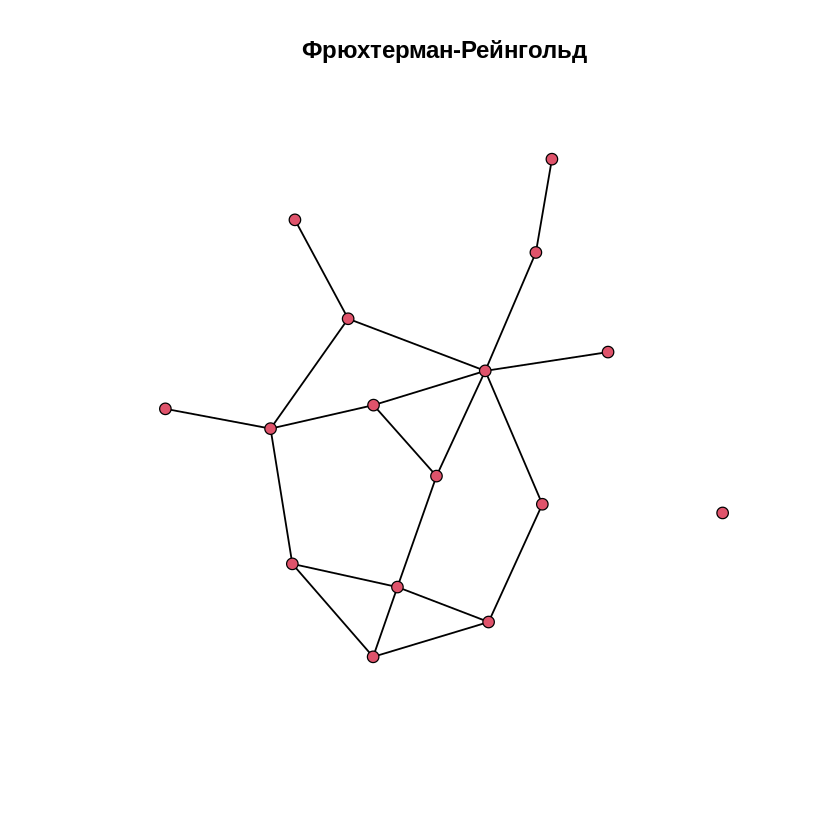

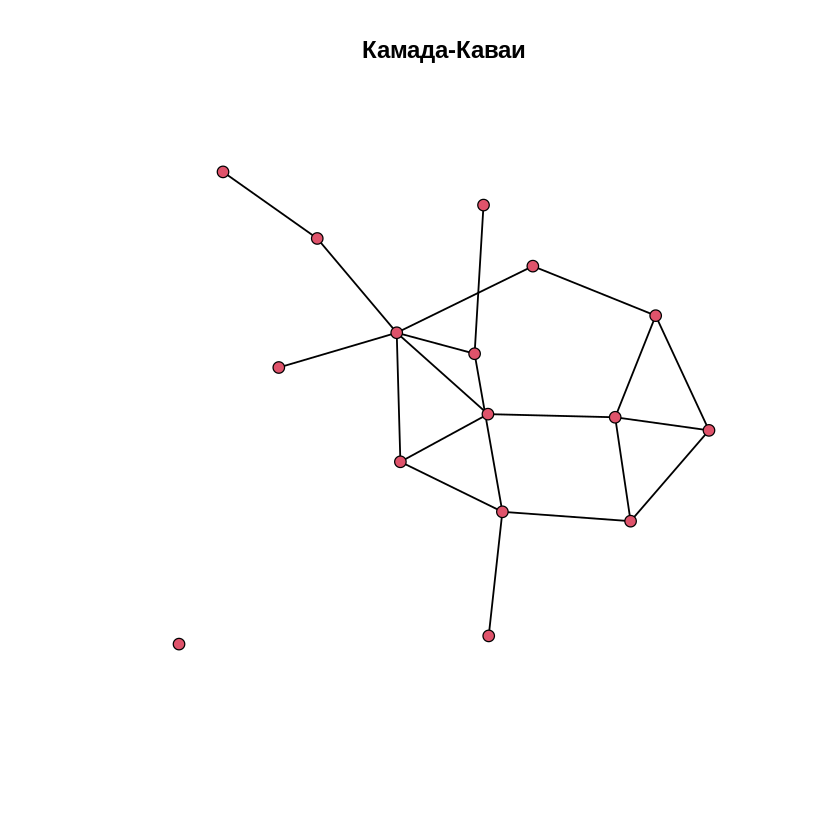

In [36]:
# №5
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(mat, main = "Фрюхтерман-Рейнгольд", mode = "fruchtermanreingold")

# Алгоритм Камада-Каваи
plot(mat, main = "Камада-Каваи", mode = "kamadakawai")

#### №6

In [37]:
# №6
summary(mat)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    9    1
 [2,]    6    2
 [3,]    7    2
 [4,]    9    2
 [5,]    5    3
 [6,]    9    3
 [7,]    7    4
 [8,]   11    4
 [9,]   15    4
[10,]   11    5
[11,]   15    5
[12,]    8    7
[13,]   16    7
[14,]   13    9
[15,]   14    9
[16,]   16    9
[17,]   14   10
[18,]   15   11
[19,]   15   13
[20,]   16   13

Не направленный граф на 16 вершин и 20 рёбер, не является гиперграфом, мультиграфом, двудольным графом, без петель, имеет плотность 0.1(6)

#### №7

In [44]:
# №7

# Вычислить размер сети
n <- network.size(mat)
m <- network.edgecount(mat)
cat("Количество вершин:", n, "\n")
cat("Количество рёбер:", m, "\n\n")

cat("Плотность вручную:", round(m / (n*(n-1)/2), 3), "\n")
cat("Плотность через функцию:", round(gden(mat, 3), 3), "\n\n")

cat("Компонент связности:", components(g)$no, "\n\n")

cat("Диаметр:", diameter(g, directed = FALSE, unconnected = TRUE), "\n\n")

cat("Коэффициент кластеризации:", round(transitivity(g, type = "global"), 3), "\n")

Количество вершин: 16 
Количество рёбер: 20 

Плотность вручную: 0.167 
Плотность через функцию: 0.167 

Компонент связности: 2 

Диаметр: 5 

Коэффициент кластеризации: 0.191 


Плотность посчитана верно.
Компонент связности, судя по графику, 2, что подтверждается результатами встроенной функцией.
Диаметр равен 5, значит диаметр равен 5.
Коэффициент кластеризации равен 0.191, значит сеть не очень кучкуется.

#### №8

In [39]:
# №8
noniso <- V(g)[degree(g) > 0]

deg <- degree(g)

deg_norm <- deg[noniso] / (vcount(g) - 1)

clos <- closeness(g, vids = noniso,  normalized = TRUE)
betwen <- betweenness(g, v = noniso, directed = FALSE, normalized = TRUE)


info <- infocent(mat, gmode = "graph")[noniso]
info_norm <- info / sum(info)

res <- data.frame(
  vertex      = V(g)[noniso],
  degree      = deg_norm,
  closeness  = clos,
  betweenness   = betwen,
  information = info_norm
)

print(res)

   vertex     degree closeness betweenness information
1       1 0.06666667 0.3684211  0.00000000  0.04888337
2       2 0.20000000 0.4827586  0.18412698  0.07420618
3       3 0.13333333 0.4375000  0.08095238  0.06806768
4       4 0.20000000 0.4000000  0.09047619  0.07440436
5       5 0.20000000 0.3888889  0.04761905  0.07093025
6       6 0.06666667 0.3333333  0.00000000  0.04247749
7       7 0.26666667 0.4666667  0.22063492  0.08237553
8       8 0.06666667 0.3255814  0.00000000  0.04503400
9       9 0.40000000 0.5600000  0.45238095  0.09623768
10     10 0.06666667 0.2857143  0.00000000  0.03451350
11     11 0.20000000 0.3684211  0.01904762  0.06948651
12     13 0.20000000 0.5000000  0.09841270  0.08080542
13     14 0.13333333 0.3888889  0.12380952  0.05288696
14     15 0.26666667 0.4375000  0.08888889  0.07871792
15     16 0.20000000 0.4827586  0.07936508  0.08097318


Центральности такие разные: какие-то маленькие, какие-то большие по значениям.
Каждый описывает сеть по своему. Например, при помощи betweenness можно явно разглядеть листы сети.

#### №9 (1-7)
Выполнение заданий для другой социоматрицы

In [41]:
data_vec2 <-c(0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
              0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
              0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
              1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
              1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
              0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
              1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
              0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
              0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0)

m2 <- matrix(data_vec2, nrow = 21, ncol = 21)
m2

g2 <- graph_from_adjacency_matrix(m2, mode = "directed")

# №1
mat2 <- network(m2, directed = TRUE)

# №2
edges2 <- as.edgelist(mat2)
edges2[1:5,]

0,1,0,1,0,0,0,0,0,0,⋯,1,0,0,1,1,1,0,1,0,0
1,0,0,1,1,1,0,0,0,0,⋯,0,0,0,0,1,1,1,1,0,1
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,⋯,1,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,1,⋯,0,1,0,1,0,1,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,1,0,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,1,⋯,0,0,0,0,0,1,0,0,0,0
0,0,0,0,1,1,0,0,0,1,⋯,0,0,0,1,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,1,0,1,0,1,1,0


1,2
1,4
1,11
1,12
1,15


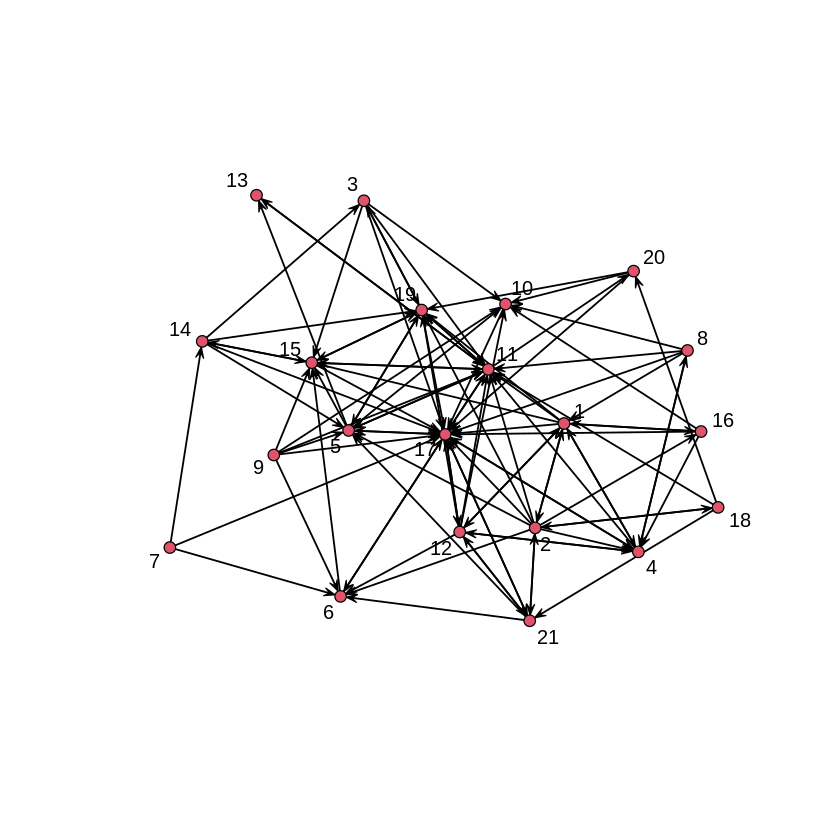

In [13]:
# №4 подаём матрицу, и просим отобразить имена вершин
plot(mat2, displaylabels = TRUE)

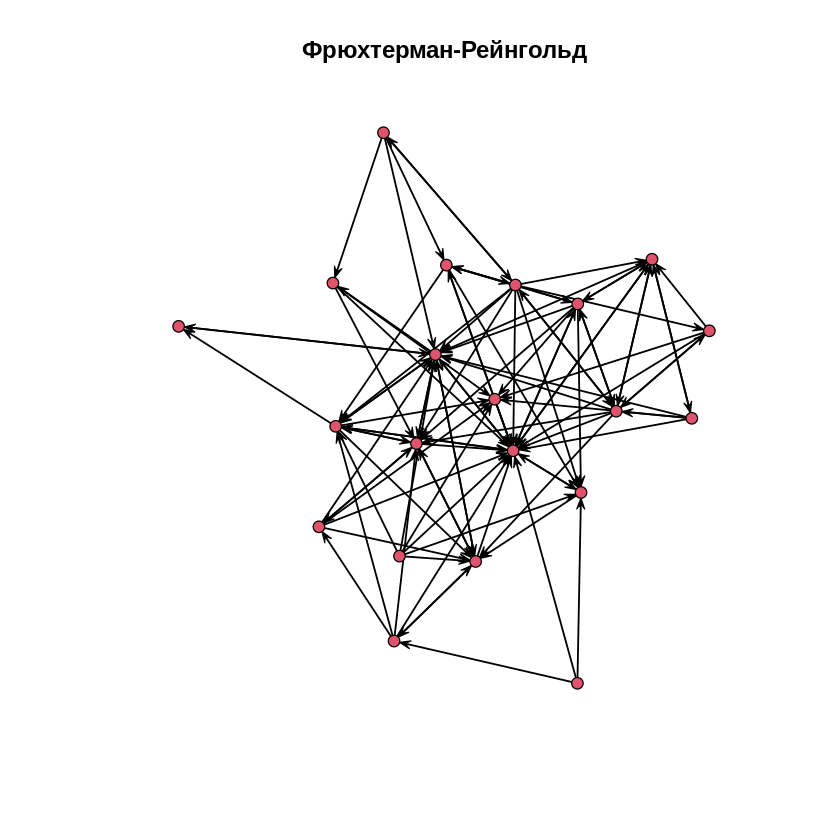

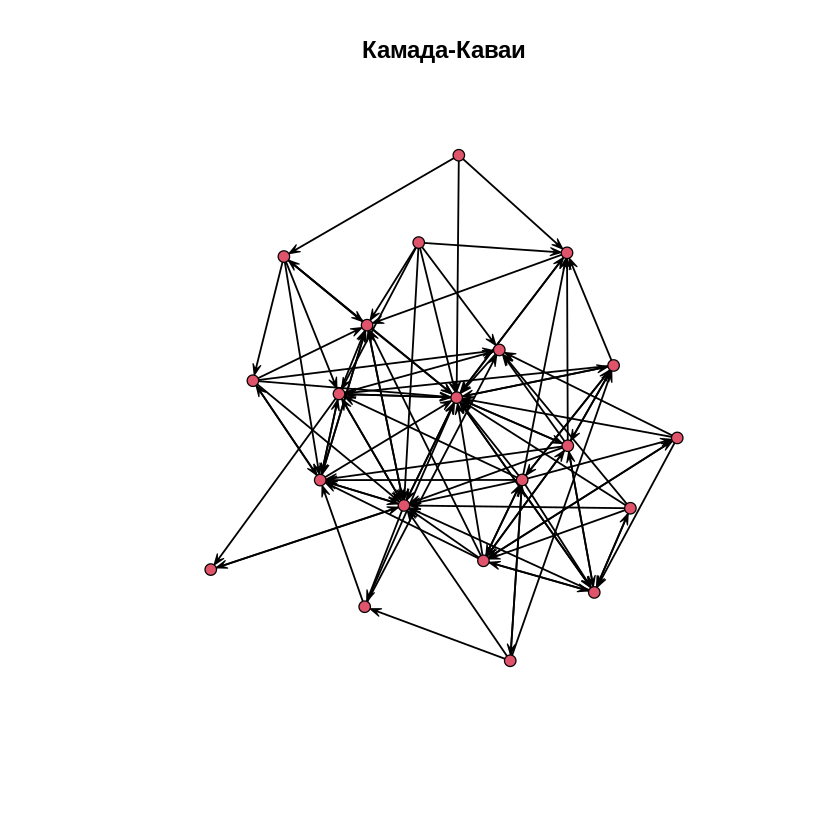

In [14]:
# №5
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(mat2, main = "Фрюхтерман-Рейнгольд", mode = "fruchtermanreingold")

# Алгоритм Камада-Каваи
plot(mat2, main = "Камада-Каваи", mode = "kamadakawai")

In [15]:
# №6
summary(mat2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    2    1
  [2,]    4    1
  [3,]    8    1
  [4,]   12    1
  [5,]   16    1
  [6,]    1    2
  [7,]   18    2
  [8,]   21    2
  [9,]   14    3
 [10,]   19    3
 [11,]    1    4
 [12,]    2    4
 [13,]    8    4
 [14,]   12    4
 [15,]   16    4
 [16,]   17    4
 [17,]    2    5
 [18,]    9    5
 [19,]   11    5
 [20,]   14    5
 [21,]   17    5
 [22,]   19    5
 [23,]   21    5
 [24,]    2    6
 [25,]    7    6
 [26,]    9    6
 [27,]   12    6
 [28,]   17    6
 [29,]   21    6
 [30,]    4    8
 [31,]    3   10
 [32,]    5   10
 [33,]    8   10
 [34,]    9   10
 [35,]   12   10
 [36,]   16   10
 [37,]   20   10


In [16]:
# №7

# Вычислить размер сети
n2 <- network.size(mat2)
m2 <- network.edgecount(mat2)
cat("Количество вершин:", n2, "\n")
cat("Количество рёбер:", m2, "\n\n")

cat("Плотность вручную:", round(m2 / (n2*(n2-1)), 3), "\n")
cat("Плотность через функцию:", round(gden(mat2), 3), "\n\n")

cat("Компонент связности:", components(g2)$no, "\n\n")

cat("Диаметр:", diameter(g2, directed = TRUE, unconnected = TRUE), "\n\n")

cat("Коэффициент кластеризации:", round(transitivity(g2, type = "global"), 3), "\n")

Количество вершин: 21 
Количество рёбер: 102 

Плотность вручную: 0.243 
Плотность через функцию: 0.243 

Компонент связности: 1 

Диаметр: 5 

Коэффициент кластеризации: 0.471 


#### №10

In [45]:
calculate_degree_prestige_igraph <- function(g) {
  g_count <- vcount(g)
  in_degree <- degree(g, mode = "in")
  P_D <- in_degree / (g_count - 1)
  return(P_D)
}

calculate_proximity_prestige_igraph <- function(g) {
  g_count <- vcount(g)
  dist_matrix <- distances(g, mode = "in")

  P_P <- sapply(1:g_count, function(i) {
    distances_from_i <- dist_matrix[i, ]
    reachable_vertices <- distances_from_i[is.finite(distances_from_i) & distances_from_i > 0]
    I_i <- length(reachable_vertices)

    if (I_i == 0) return(0)

    sum_distances <- sum(reachable_vertices)
    prestige <- (I_i / (g_count - 1)) * (I_i / sum_distances)
    return(prestige)
  })

  return(P_P)
}

calculate_rank_prestige_igraph <- function(g) {
  X <- as.matrix(as_adjacency_matrix(g))
  g_count <- vcount(g)

  p0 <- colSums(X) / sum(colSums(X))

  alpha <- 0.85  # коэффициент затухания
  E <- matrix(1/g_count, nrow = g_count, ncol = g_count)

  P <- alpha * X + (1 - alpha) * E

  col_sums <- colSums(P)
  col_sums[col_sums == 0] <- 1
  P_norm <- t(t(P) / col_sums)

  p_current <- p0
  for (i in 1:100) {
    p_next <- P_norm %*% p_current
    p_next <- p_next / sum(p_next)

    if (sqrt(sum((p_next - p_current)^2)) < 1e-10) {
      break
    }
    p_current <- p_next
  }

  return(as.numeric(p_current))
}

P_D_igraph <- calculate_degree_prestige_igraph(g2)
P_P_igraph <- calculate_proximity_prestige_igraph(g2)
P_R_igraph <- calculate_rank_prestige_igraph(g2)

results_igraph <- data.frame(
  Degree_Prestige = round(P_D_igraph, 4),
  Proximity_Prestige = round(P_P_igraph, 4),
  Rank_Prestige = round(P_R_igraph, 4)
)

print(results_igraph)

   Degree_Prestige Proximity_Prestige Rank_Prestige
1             0.25             0.4167        0.1243
2             0.15             0.4000        0.1710
3             0.10             0.4082        0.0162
4             0.30             0.5714        0.0943
5             0.35             0.6061        0.0191
6             0.30             0.5714        0.0108
7             0.00             0.0000        0.0205
8             0.05             0.3704        0.0502
9             0.00             0.0000        0.0181
10            0.35             0.5405        0.0080
11            0.65             0.7407        0.0241
12            0.20             0.5405        0.0745
13            0.10             0.4651        0.0063
14            0.10             0.4000        0.0234
15            0.40             0.6061        0.0230
16            0.10             0.3125        0.0484
17            0.90             0.9091        0.0639
18            0.05             0.2899        0.0856
19          

## Выводы

Работа выполнена с большим трудом из-за незнания возможностей языка, библиотек и синтаксиса. Часто возникали проблемы с работой функций в среде google colab, который в теории не должны были возникать.
Опыт работы с библиотеками network и igraph получен. Анализ сети при помощи "ручных" и готовых функций проведён.